# 2 - Data Wrangling

O objetivo deste notebook é utilizar o csv criado após o merge na etapa anterior para:
* Entender melhor todas as features
* Buscar por valores com grafias incorretas e inconsistências
* Corrigir types
* Identificar correlações entre features
* Criar novas features usando existentes
* Preencher missing values
* Identificar outliers
* Identificar valores sem sentido (exemplo: prazo para pagamento negativo)


In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Importando libs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Carregando base criada após merge

train = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Datarisk/data/train.csv', low_memory=False)

In [4]:
train

,ID_CLIENTE,SAFRA_REF_x,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,DATA_CADASTRO,DDD,FLAG_PF,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,CEP_2_DIG,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS,SAFRA_REF_y
0,1661240395903230676,2018-09,2018-08-17,2018-09-06,2018-09-06,35516.41,6.99,2013-08-22,99,NaN,Serviços,YAHOO,PEQUENO,65,290074.138889,99.361111,2018-09
1,1661240395903230676,2018-09,2018-08-19,2018-09-11,2018-09-10,17758.21,6.99,2013-08-22,99,NaN,Serviços,YAHOO,PEQUENO,65,290074.138889,99.361111,2018-09
2,1661240395903230676,2018-09,2018-08-26,2018-09-18,2018-09-17,17431.96,6.99,2013-08-22,99,NaN,Serviços,YAHOO,PEQUENO,65,290074.138889,99.361111,2018-09
3,1661240395903230676,2018-09,2018-08-30,2018-10-11,2018-10-05,1341.00,6.99,2013-08-22,99,NaN,Serviços,YAHOO,PEQUENO,65,290074.138889,99.361111,2018-09
4,1661240395903230676,2018-09,2018-08-31,2018-09-20,2018-09-20,21309.85,6.99,2013-08-22,99,NaN,Serviços,YAHOO,PEQUENO,65,290074.138889,99.361111,2018-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89684,957773253650890560,2021-11,2021-11-14,2021-12-06,2021-12-06,266.08,5.99,2021-07-05,NaN,NaN,Comércio,GMAIL,MEDIO,20,433808.000000,121.000000,2021-11
89685,6094038865287329652,2021-11,2021-11-14,2021-12-06,2021-12-06,301.49,8.99,2021-07-05,NaN,NaN,Serviços,GMAIL,GRANDE,48,532236.000000,136.000000,2021-11
89686,6893616200284527465,2021-12,2021-11-16,2021-12-08,2021-12-08,48520.00,5.99,NaN,NaN,NaN,Comércio,HOTMAIL,MEDIO,na,108073.000000,129.000000,2021-12
89687,7222128416864635362,2021-12,2021-11-16,2021-12-08,2021-12-08,71332.50,8.99,NaN,NaN,NaN,Serviços,GMAIL,MEDIO,na,69394.000000,119.000000,2021-12


In [5]:
train.shape

(89689, 17)

Temos 89k+ linhas e 17 features.

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89689 entries, 0 to 89688
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_CLIENTE              89689 non-null  int64  
 1   SAFRA_REF_x             89689 non-null  object 
 2   DATA_EMISSAO_DOCUMENTO  89689 non-null  object 
 3   DATA_PAGAMENTO          89689 non-null  object 
 4   DATA_VENCIMENTO         89689 non-null  object 
 5   VALOR_A_PAGAR           89689 non-null  float64
 6   TAXA                    89689 non-null  float64
 7   DATA_CADASTRO           89651 non-null  object 
 8   DDD                     80898 non-null  object 
 9   FLAG_PF                 266 non-null    object 
 10  SEGMENTO_INDUSTRIAL     88056 non-null  object 
 11  DOMINIO_EMAIL           88621 non-null  object 
 12  PORTE                   86834 non-null  object 
 13  CEP_2_DIG               89689 non-null  object 
 14  RENDA_MES_ANTERIOR      89689 non-null

Existem features com type incorreto (datetime e etc), vamos tratá-las mais pra frente.

## 2.1 Correção de valores

In [7]:
# Visualizando valores únicos de cada feature

for i in train:
  print(f'{i}:')
  print(train[i].unique())
  print('------' * 10)

ID_CLIENTE:
[1661240395903230676 8274986328479596038  345447888460137901 ...
 6893616200284527465 7222128416864635362 1592581784061157609]
------------------------------------------------------------
SAFRA_REF_x:
['2018-09' '2018-10' '2018-11' '2018-12' '2019-01' '2019-02' '2019-03'
 '2019-04' '2019-05' '2019-06' '2019-07' '2019-08' '2019-09' '2019-10'
 '2019-11' '2019-12' '2020-01' '2020-02' '2020-03' '2020-05' '2020-06'
 '2020-07' '2020-08' '2020-09' '2020-10' '2020-11' '2020-12' '2021-02'
 '2021-04' '2021-05' '2021-06' '2021-07' '2021-08' '2021-09' '2021-10'
 '2021-11' '2020-04' '2021-01' '2021-03' '2021-12']
------------------------------------------------------------
DATA_EMISSAO_DOCUMENTO:
['2018-08-17' '2018-08-19' '2018-08-26' ... '2019-12-10' '2020-12-10'
 '2020-06-06']
------------------------------------------------------------
DATA_PAGAMENTO:
['2018-09-06' '2018-09-11' '2018-09-18' '2018-10-11' '2018-09-20'
 '2018-10-09' '2018-10-15' '2018-10-30' '2018-11-07' '2018-11-12'
 

Temos valores como '(' e inconsistências no DDD, vamos tratá-los.

In [8]:
train['DDD'] = train['DDD'].str.replace('(','', regex=True)
train['DDD'] = train['DDD'].str.replace('00','0')
train['DDD'] = train['DDD'].str.replace('02','2')
train['DDD'] = train['DDD'].str.replace('04','4')
train['DDD'] = train['DDD'].str.replace('07','7')

In [9]:
print(len(train.loc[train['CEP_2_DIG'] == 'na']))

47


In [10]:
# Existem apenas 47 linhas com valores 'na' no CEP, podemos tirá-los do dataframe pois temos mais de 1300
train = train.loc[train['CEP_2_DIG'] != 'na']

## 2.2 Missing values

In [11]:
# Como temos o CEP_2_DIG, vou deletar o DDD pois possuem praticamente o mesmo significado (alta correlação) e o DDD muitos missing values

train = train.drop(columns={'DDD'})

In [12]:
train.isnull().sum()

ID_CLIENTE                    0
SAFRA_REF_x                   0
DATA_EMISSAO_DOCUMENTO        0
DATA_PAGAMENTO                0
DATA_VENCIMENTO               0
VALOR_A_PAGAR                 0
TAXA                          0
DATA_CADASTRO                 0
FLAG_PF                   89376
SEGMENTO_INDUSTRIAL        1633
DOMINIO_EMAIL              1068
PORTE                      2854
CEP_2_DIG                     0
RENDA_MES_ANTERIOR            0
NO_FUNCIONARIOS               0
SAFRA_REF_y                   0
dtype: int64

Possuímos missing diversos missing values, vamos tratá-los mas também preencher a feature 'FLAG_PF' com PJ e alterar o X para PF.

In [13]:
# Replace de X por PF e fill de missing com PJ em FLAG_PF
train['FLAG_PF'] = train['FLAG_PF'].fillna('PJ')
train['FLAG_PF'] = train['FLAG_PF'].str.replace('X','PF')

# Preenchendo missing values de variáveis categóricas com 'SEM_VALOR'
replace_strings = 'SEM_VALOR'
train['PORTE'] = train['PORTE'].fillna(replace_strings)
train['DOMINIO_EMAIL'] = train['DOMINIO_EMAIL'].fillna(replace_strings)
train['SEGMENTO_INDUSTRIAL'] = train['SEGMENTO_INDUSTRIAL'].fillna(replace_strings)

# Preenchendo missing values de DATA_CADASTRO com mode
mode_cadastro = train['DATA_CADASTRO'].mode()[0]
train['DATA_CADASTRO'] = train['DATA_CADASTRO'].fillna(mode_cadastro)


In [14]:
train.isnull().sum()

ID_CLIENTE                0
SAFRA_REF_x               0
DATA_EMISSAO_DOCUMENTO    0
DATA_PAGAMENTO            0
DATA_VENCIMENTO           0
VALOR_A_PAGAR             0
TAXA                      0
DATA_CADASTRO             0
FLAG_PF                   0
SEGMENTO_INDUSTRIAL       0
DOMINIO_EMAIL             0
PORTE                     0
CEP_2_DIG                 0
RENDA_MES_ANTERIOR        0
NO_FUNCIONARIOS           0
SAFRA_REF_y               0
dtype: int64

## 2.3 Correção de types

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89642 entries, 0 to 89688
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_CLIENTE              89642 non-null  int64  
 1   SAFRA_REF_x             89642 non-null  object 
 2   DATA_EMISSAO_DOCUMENTO  89642 non-null  object 
 3   DATA_PAGAMENTO          89642 non-null  object 
 4   DATA_VENCIMENTO         89642 non-null  object 
 5   VALOR_A_PAGAR           89642 non-null  float64
 6   TAXA                    89642 non-null  float64
 7   DATA_CADASTRO           89642 non-null  object 
 8   FLAG_PF                 89642 non-null  object 
 9   SEGMENTO_INDUSTRIAL     89642 non-null  object 
 10  DOMINIO_EMAIL           89642 non-null  object 
 11  PORTE                   89642 non-null  object 
 12  CEP_2_DIG               89642 non-null  object 
 13  RENDA_MES_ANTERIOR      89642 non-null  float64
 14  NO_FUNCIONARIOS         89642 non-null

In [16]:
# Convertendo features de data para datetime

train['SAFRA_REF_x'] = pd.to_datetime(train['SAFRA_REF_x'])
train['DATA_EMISSAO_DOCUMENTO'] = pd.to_datetime(train['DATA_EMISSAO_DOCUMENTO'])
train['DATA_PAGAMENTO'] = pd.to_datetime(train['DATA_PAGAMENTO'])
train['DATA_VENCIMENTO'] = pd.to_datetime(train['DATA_VENCIMENTO'])
train['DATA_CADASTRO'] = pd.to_datetime(train['DATA_CADASTRO'])
train['SAFRA_REF_y'] = pd.to_datetime(train['SAFRA_REF_y'])

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89642 entries, 0 to 89688
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID_CLIENTE              89642 non-null  int64         
 1   SAFRA_REF_x             89642 non-null  datetime64[ns]
 2   DATA_EMISSAO_DOCUMENTO  89642 non-null  datetime64[ns]
 3   DATA_PAGAMENTO          89642 non-null  datetime64[ns]
 4   DATA_VENCIMENTO         89642 non-null  datetime64[ns]
 5   VALOR_A_PAGAR           89642 non-null  float64       
 6   TAXA                    89642 non-null  float64       
 7   DATA_CADASTRO           89642 non-null  datetime64[ns]
 8   FLAG_PF                 89642 non-null  object        
 9   SEGMENTO_INDUSTRIAL     89642 non-null  object        
 10  DOMINIO_EMAIL           89642 non-null  object        
 11  PORTE                   89642 non-null  object        
 12  CEP_2_DIG               89642 non-null  object

## 2.4 Feaure Engineering

In [18]:
# Criação de feature PRAZO
train['PRAZO'] = train['DATA_VENCIMENTO'] - train['DATA_EMISSAO_DOCUMENTO']

In [19]:
# Criação de features com diferença em dias entre vencimento e emissão
train['PAGTO_DIFF_VENC'] = train['DATA_PAGAMENTO'] - train['DATA_VENCIMENTO']
train['PAGTO_DIFF_EMISSAO'] = train['DATA_PAGAMENTO'] - train['DATA_EMISSAO_DOCUMENTO']

In [20]:
venceu = []

for i in train['PAGTO_DIFF_VENC']:
  if i.days < 5:
    venceu.append(0)
  elif i.days >= 5:
    venceu.append(1)

train['INADIMPLENTE'] = venceu

In [21]:
train['INADIMPLENTE'].value_counts()

0    83662
1     5980
Name: INADIMPLENTE, dtype: int64

Temos um dataset desbalanceado, vamos lidar com isso na etapa de modelagem.

In [22]:
'''Como os números do CEP possuem significado, vamos pegar o primeiro que
representa a Zona Postal. O segundo possui muitas variáveis dentro de cada
Zona Postal, portanto vou usar apenas o primeiro'''

primeiro_numero = []

for i in train['CEP_2_DIG']:
  primeiro = i[0]
  if primeiro == '0':
    primeiro_numero.append('Região Metropolitana de São Paulo')
  elif primeiro == '1':
      primeiro_numero.append('Litoral e interior de SP')
  elif primeiro == '2':
      primeiro_numero.append('RJ / ES')
  elif primeiro == '3':
      primeiro_numero.append('MG')
  elif primeiro == '4':
      primeiro_numero.append('BH / SE')
  elif primeiro == '5':
      primeiro_numero.append('PE / AL / PB / RN')
  elif primeiro == '6':
      primeiro_numero.append('CE / PI / MA / PA / AP / AM / RR / AC')
  elif primeiro == '7':
      primeiro_numero.append('DF / GO / RO / TO / MT / MS')
  elif primeiro == '8':
      primeiro_numero.append('PR / SC')
  elif primeiro == '9':
      primeiro_numero.append('RS')

train['ZONA_POSTAL'] = primeiro_numero

train['CEP_2_DIG'] = train['CEP_2_DIG'].astype('int')

In [23]:
train

,ID_CLIENTE,SAFRA_REF_x,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,DATA_CADASTRO,FLAG_PF,SEGMENTO_INDUSTRIAL,...,PORTE,CEP_2_DIG,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS,SAFRA_REF_y,PRAZO,PAGTO_DIFF_VENC,PAGTO_DIFF_EMISSAO,INADIMPLENTE,ZONA_POSTAL
0,1661240395903230676,2018-09-01,2018-08-17,2018-09-06,2018-09-06,35516.41,6.99,2013-08-22,PJ,Serviços,...,PEQUENO,65,290074.138889,99.361111,2018-09-01,20 days,0 days,20 days,0,CE / PI / MA / PA / AP / AM / RR / AC
1,1661240395903230676,2018-09-01,2018-08-19,2018-09-11,2018-09-10,17758.21,6.99,2013-08-22,PJ,Serviços,...,PEQUENO,65,290074.138889,99.361111,2018-09-01,22 days,1 days,23 days,0,CE / PI / MA / PA / AP / AM / RR / AC
2,1661240395903230676,2018-09-01,2018-08-26,2018-09-18,2018-09-17,17431.96,6.99,2013-08-22,PJ,Serviços,...,PEQUENO,65,290074.138889,99.361111,2018-09-01,22 days,1 days,23 days,0,CE / PI / MA / PA / AP / AM / RR / AC
3,1661240395903230676,2018-09-01,2018-08-30,2018-10-11,2018-10-05,1341.00,6.99,2013-08-22,PJ,Serviços,...,PEQUENO,65,290074.138889,99.361111,2018-09-01,36 days,6 days,42 days,1,CE / PI / MA / PA / AP / AM / RR / AC
4,1661240395903230676,2018-09-01,2018-08-31,2018-09-20,2018-09-20,21309.85,6.99,2013-08-22,PJ,Serviços,...,PEQUENO,65,290074.138889,99.361111,2018-09-01,20 days,0 days,20 days,0,CE / PI / MA / PA / AP / AM / RR / AC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89681,3431426889924624821,2021-11-01,2021-11-12,2021-11-29,2021-11-29,56879.10,6.99,2020-08-13,PJ,Serviços,...,MEDIO,69,227342.000000,125.000000,2021-11-01,17 days,0 days,17 days,0,CE / PI / MA / PA / AP / AM / RR / AC
89682,5288503299611498087,2021-11-01,2021-11-14,2021-11-30,2021-12-01,156725.15,5.99,2020-11-03,PJ,Comércio,...,PEQUENO,13,352642.000000,137.000000,2021-11-01,17 days,-1 days,16 days,0,Litoral e interior de SP
89684,957773253650890560,2021-11-01,2021-11-14,2021-12-06,2021-12-06,266.08,5.99,2021-07-05,PJ,Comércio,...,MEDIO,20,433808.000000,121.000000,2021-11-01,22 days,0 days,22 days,0,RJ / ES
89685,6094038865287329652,2021-11-01,2021-11-14,2021-12-06,2021-12-06,301.49,8.99,2021-07-05,PJ,Serviços,...,GRANDE,48,532236.000000,136.000000,2021-11-01,22 days,0 days,22 days,0,BH / SE


In [24]:
# Criação de feature LIFETIME_CLIENTE_DIAS para sabermos há quanto tempo ele é cliente da empresa
train['LIFETIME_CLIENTE_DIAS'] = train['DATA_EMISSAO_DOCUMENTO'] - train['DATA_CADASTRO']
train['LIFETIME_CLIENTE_DIAS'] = train['LIFETIME_CLIENTE_DIAS'].dt.days

In [25]:
train

,ID_CLIENTE,SAFRA_REF_x,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,DATA_CADASTRO,FLAG_PF,SEGMENTO_INDUSTRIAL,...,CEP_2_DIG,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS,SAFRA_REF_y,PRAZO,PAGTO_DIFF_VENC,PAGTO_DIFF_EMISSAO,INADIMPLENTE,ZONA_POSTAL,LIFETIME_CLIENTE_DIAS
0,1661240395903230676,2018-09-01,2018-08-17,2018-09-06,2018-09-06,35516.41,6.99,2013-08-22,PJ,Serviços,...,65,290074.138889,99.361111,2018-09-01,20 days,0 days,20 days,0,CE / PI / MA / PA / AP / AM / RR / AC,1821
1,1661240395903230676,2018-09-01,2018-08-19,2018-09-11,2018-09-10,17758.21,6.99,2013-08-22,PJ,Serviços,...,65,290074.138889,99.361111,2018-09-01,22 days,1 days,23 days,0,CE / PI / MA / PA / AP / AM / RR / AC,1823
2,1661240395903230676,2018-09-01,2018-08-26,2018-09-18,2018-09-17,17431.96,6.99,2013-08-22,PJ,Serviços,...,65,290074.138889,99.361111,2018-09-01,22 days,1 days,23 days,0,CE / PI / MA / PA / AP / AM / RR / AC,1830
3,1661240395903230676,2018-09-01,2018-08-30,2018-10-11,2018-10-05,1341.00,6.99,2013-08-22,PJ,Serviços,...,65,290074.138889,99.361111,2018-09-01,36 days,6 days,42 days,1,CE / PI / MA / PA / AP / AM / RR / AC,1834
4,1661240395903230676,2018-09-01,2018-08-31,2018-09-20,2018-09-20,21309.85,6.99,2013-08-22,PJ,Serviços,...,65,290074.138889,99.361111,2018-09-01,20 days,0 days,20 days,0,CE / PI / MA / PA / AP / AM / RR / AC,1835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89681,3431426889924624821,2021-11-01,2021-11-12,2021-11-29,2021-11-29,56879.10,6.99,2020-08-13,PJ,Serviços,...,69,227342.000000,125.000000,2021-11-01,17 days,0 days,17 days,0,CE / PI / MA / PA / AP / AM / RR / AC,456
89682,5288503299611498087,2021-11-01,2021-11-14,2021-11-30,2021-12-01,156725.15,5.99,2020-11-03,PJ,Comércio,...,13,352642.000000,137.000000,2021-11-01,17 days,-1 days,16 days,0,Litoral e interior de SP,376
89684,957773253650890560,2021-11-01,2021-11-14,2021-12-06,2021-12-06,266.08,5.99,2021-07-05,PJ,Comércio,...,20,433808.000000,121.000000,2021-11-01,22 days,0 days,22 days,0,RJ / ES,132
89685,6094038865287329652,2021-11-01,2021-11-14,2021-12-06,2021-12-06,301.49,8.99,2021-07-05,PJ,Serviços,...,48,532236.000000,136.000000,2021-11-01,22 days,0 days,22 days,0,BH / SE,132


In [26]:
# Criando novas features com dias
train['PAGTO_DIFF_VENC'] = train['PAGTO_DIFF_VENC'].dt.days
train['PAGTO_DIFF_EMISSAO'] = train['PAGTO_DIFF_EMISSAO'].dt.days
train['PRAZO'] = train['PRAZO'].dt.days

In [27]:
train = train.drop(columns={'SAFRA_REF_y'})
train = train.rename(columns={'SAFRA_REF_x':'SAFRA_REF'})

In [28]:
# Criando features com mês, ano e dia da semana

train['MES_EMISSAO_DOCUMENTO'] = train['DATA_EMISSAO_DOCUMENTO'].dt.month
train['MES_PAGAMENTO'] = train['DATA_PAGAMENTO'].dt.month
train['MES_VENCIMENTO'] = train['DATA_VENCIMENTO'].dt.month
train['MES_CADASTRO'] = train['DATA_CADASTRO'].dt.month
train['MES_SAFRA_REF'] = train['SAFRA_REF'].dt.month

train['DIASEMANA_EMISSAO'] = train['DATA_EMISSAO_DOCUMENTO'].dt.day_name()
train['DIASEMANA_PAGAMENTO'] = train['DATA_PAGAMENTO'].dt.day_name()
train['DIASEMANA_VENCIMENTO'] = train['DATA_VENCIMENTO'].dt.day_name()
train['DIASEMANA_CADASTRO'] = train['DATA_CADASTRO'].dt.day_name()
train['DIASEMANA_SAFRA_REF'] = train['SAFRA_REF'].dt.day_name()

train['ANO_EMISSAO_DOCUMENTO'] = train['DATA_EMISSAO_DOCUMENTO'].dt.year
train['ANO_PAGAMENTO'] = train['DATA_PAGAMENTO'].dt.year
train['ANO_VENCIMENTO'] = train['DATA_VENCIMENTO'].dt.year
train['ANO_CADASTRO'] = train['DATA_CADASTRO'].dt.year
train['ANO_SAFRA_REF'] = train['SAFRA_REF'].dt.year

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89642 entries, 0 to 89688
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID_CLIENTE              89642 non-null  int64         
 1   SAFRA_REF               89642 non-null  datetime64[ns]
 2   DATA_EMISSAO_DOCUMENTO  89642 non-null  datetime64[ns]
 3   DATA_PAGAMENTO          89642 non-null  datetime64[ns]
 4   DATA_VENCIMENTO         89642 non-null  datetime64[ns]
 5   VALOR_A_PAGAR           89642 non-null  float64       
 6   TAXA                    89642 non-null  float64       
 7   DATA_CADASTRO           89642 non-null  datetime64[ns]
 8   FLAG_PF                 89642 non-null  object        
 9   SEGMENTO_INDUSTRIAL     89642 non-null  object        
 10  DOMINIO_EMAIL           89642 non-null  object        
 11  PORTE                   89642 non-null  object        
 12  CEP_2_DIG               89642 non-null  int64 

## 2.5 Outliers e valores incondizentes

In [30]:
# Removendo scientific notation pra facilitar visualização de valores
pd.set_option('display.float_format', lambda x: f'{x:.3f}')

In [31]:
train.describe()

,ID_CLIENTE,VALOR_A_PAGAR,TAXA,CEP_2_DIG,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS,PRAZO,PAGTO_DIFF_VENC,PAGTO_DIFF_EMISSAO,INADIMPLENTE,...,MES_EMISSAO_DOCUMENTO,MES_PAGAMENTO,MES_VENCIMENTO,MES_CADASTRO,MES_SAFRA_REF,ANO_EMISSAO_DOCUMENTO,ANO_PAGAMENTO,ANO_VENCIMENTO,ANO_CADASTRO,ANO_SAFRA_REF
count,89642.000,89642.000,89642.000,89642.000,89642.000,89642.000,89642.000,89642.000,89642.000,89642.000,...,89642.000,89642.000,89642.000,89642.000,89642.000,89642.000,89642.000,89642.000,89642.000,89642.000
mean,4663869037601431552.000,49208.474,6.792,53.331,291034.030,118.931,23.168,-0.288,22.880,0.067,...,6.838,6.900,6.892,5.850,6.919,2019.783,2019.840,2019.843,2009.931,2019.817
std,2666078046803870208.000,48175.508,1.803,27.866,43839.832,18.083,26.527,25.650,16.828,0.250,...,3.420,3.476,3.484,3.290,3.457,0.984,0.966,0.969,6.323,0.975
min,8784237149961904.000,0.100,4.990,11.000,1191.000,0.000,-420.000,-2661.000,-265.000,0.000,...,1.000,1.000,1.000,1.000,1.000,2018.000,2018.000,2017.000,2000.000,2018.000
25%,2347028805684088320.000,19655.982,5.990,29.000,266899.115,108.170,16.000,0.000,16.000,0.000,...,4.000,4.000,4.000,2.000,4.000,2019.000,2019.000,2019.000,2005.000,2019.000
50%,4817816966382229504.000,36278.850,5.990,54.000,291396.132,118.641,18.000,0.000,18.000,0.000,...,7.000,7.000,7.000,7.000,7.000,2020.000,2020.000,2020.000,2011.000,2020.000
75%,6969348581033924608.000,64057.180,6.990,79.000,314952.450,131.000,24.000,0.000,24.000,0.000,...,10.000,10.000,10.000,8.000,10.000,2021.000,2021.000,2021.000,2015.000,2021.000
max,9206030810342980608.000,4400000.000,11.990,99.000,918421.000,188.000,2677.000,869.000,1074.000,1.000,...,12.000,12.000,12.000,12.000,12.000,2021.000,2021.000,2028.000,2021.000,2021.000


In [32]:
for i in train.select_dtypes(exclude='object'):
  print(i)
  print(f'Min: {train[i].min()}')
  print(f'Max: {train[i].max()}')
  print('------' * 10)

ID_CLIENTE
Min: 8784237149961904
Max: 9206030810342980458
------------------------------------------------------------
SAFRA_REF
Min: 2018-09-01 00:00:00
Max: 2021-12-01 00:00:00
------------------------------------------------------------
DATA_EMISSAO_DOCUMENTO
Min: 2018-08-17 00:00:00
Max: 2021-11-28 00:00:00
------------------------------------------------------------
DATA_PAGAMENTO
Min: 2018-06-19 00:00:00
Max: 2021-12-13 00:00:00
------------------------------------------------------------
DATA_VENCIMENTO
Min: 2017-11-27 00:00:00
Max: 2028-09-30 00:00:00
------------------------------------------------------------
VALOR_A_PAGAR
Min: 0.1
Max: 4400000.0
------------------------------------------------------------
TAXA
Min: 4.99
Max: 11.99
------------------------------------------------------------
DATA_CADASTRO
Min: 2000-08-15 00:00:00
Max: 2021-07-18 00:00:00
------------------------------------------------------------
CEP_2_DIG
Min: 11
Max: 99
------------------------------------

Temos outliers e valores incondizentes em:
* LIFETIME_CLIENTE_DIAS (-13)
* PAGTO_DIFF_EMISSAO (-222)
* PRAZO (-420)

Vamos tratá-los.

In [33]:
print('Dias negativos entre pagamento e emissão (Pagou antes do boleto existir):')
display(train.loc[train['PAGTO_DIFF_EMISSAO'] < 0])

print('Valores negativos de LIFETIME_CLIENTE_DIAS:')
display(train.loc[train['LIFETIME_CLIENTE_DIAS'] < 0])

print('Valores negativos de PRAZO:')
display(train.loc[train['PRAZO'] < 0])

Dias negativos entre pagamento e emissão (Pagou antes do boleto existir):


,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,DATA_CADASTRO,FLAG_PF,SEGMENTO_INDUSTRIAL,...,DIASEMANA_EMISSAO,DIASEMANA_PAGAMENTO,DIASEMANA_VENCIMENTO,DIASEMANA_CADASTRO,DIASEMANA_SAFRA_REF,ANO_EMISSAO_DOCUMENTO,ANO_PAGAMENTO,ANO_VENCIMENTO,ANO_CADASTRO,ANO_SAFRA_REF
3588,4095739077267179172,2021-09-01,2021-09-13,2021-05-04,2021-04-26,68695.440,5.990,2011-02-14,PJ,Comércio,...,Monday,Tuesday,Monday,Monday,Wednesday,2021,2021,2021,2011,2021
5390,4524147234488547993,2020-06-01,2020-05-24,2020-05-21,2020-06-10,34477.900,5.990,2017-03-09,PJ,Comércio,...,Sunday,Thursday,Wednesday,Thursday,Monday,2020,2020,2020,2017,2020
17767,984915269987074754,2020-04-01,2020-03-25,2020-03-23,2020-04-13,60465.900,11.990,2011-02-14,PJ,Serviços,...,Wednesday,Monday,Monday,Monday,Wednesday,2020,2020,2020,2011,2020
18622,3829967475074118757,2021-09-01,2021-08-18,2021-08-17,2021-09-14,109087.530,6.990,2007-03-19,PJ,Serviços,...,Wednesday,Tuesday,Tuesday,Monday,Wednesday,2021,2021,2021,2007,2021
20451,7031913170099381454,2020-02-01,2020-01-26,2019-12-30,2019-11-25,19762.600,4.990,2011-02-14,PJ,Serviços,...,Sunday,Monday,Monday,Monday,Saturday,2020,2019,2019,2011,2020
20453,7031913170099381454,2020-02-01,2020-01-26,2020-01-25,2019-12-25,19762.600,4.990,2011-02-14,PJ,Serviços,...,Sunday,Saturday,Wednesday,Monday,Saturday,2020,2020,2019,2011,2020
23335,1292049196559782171,2020-02-01,2020-01-17,2020-01-07,2020-02-01,327.600,5.990,2013-05-05,PJ,Serviços,...,Friday,Tuesday,Saturday,Sunday,Saturday,2020,2020,2020,2013,2020
23343,1292049196559782171,2020-02-01,2020-02-11,2020-01-09,2020-02-26,599.130,5.990,2013-05-05,PJ,Serviços,...,Tuesday,Thursday,Wednesday,Sunday,Saturday,2020,2020,2020,2013,2020
26210,7816319470107777265,2021-02-01,2021-02-10,2021-01-25,2021-02-25,104084.360,5.990,2000-08-15,PJ,Comércio,...,Wednesday,Monday,Thursday,Tuesday,Monday,2021,2021,2021,2000,2021
28898,7325545718770538459,2020-06-01,2020-06-07,2020-05-31,2020-06-23,13540.350,8.990,2011-02-15,PJ,Comércio,...,Sunday,Sunday,Tuesday,Tuesday,Monday,2020,2020,2020,2011,2020


Valores negativos de LIFETIME_CLIENTE_DIAS:


,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,DATA_CADASTRO,FLAG_PF,SEGMENTO_INDUSTRIAL,...,DIASEMANA_EMISSAO,DIASEMANA_PAGAMENTO,DIASEMANA_VENCIMENTO,DIASEMANA_CADASTRO,DIASEMANA_SAFRA_REF,ANO_EMISSAO_DOCUMENTO,ANO_PAGAMENTO,ANO_VENCIMENTO,ANO_CADASTRO,ANO_SAFRA_REF
75689,3690886209682028027,2018-11-01,2018-10-26,2018-11-19,2018-11-19,20522.650,11.990,2018-10-28,PJ,Serviços,...,Friday,Monday,Monday,Sunday,Thursday,2018,2018,2018,2018,2018
80156,6632750819478927641,2019-02-01,2019-02-06,2019-03-14,2019-03-14,1603.820,4.990,2019-02-18,PJ,Indústria,...,Wednesday,Thursday,Thursday,Monday,Friday,2019,2019,2019,2019,2019
80199,3950448152833572077,2019-03-01,2019-02-19,2019-04-05,2019-04-05,29180.200,4.990,2019-02-20,PJ,Comércio,...,Tuesday,Friday,Friday,Wednesday,Friday,2019,2019,2019,2019,2019
80759,4741325322140814572,2019-04-01,2019-03-20,2019-04-15,2019-04-15,1399.420,4.990,2019-03-21,PJ,Indústria,...,Wednesday,Monday,Monday,Thursday,Monday,2019,2019,2019,2019,2019
81672,873223039957991123,2019-06-01,2019-05-24,2019-06-14,2019-06-18,146129.850,6.990,2019-06-02,PJ,Serviços,...,Friday,Friday,Tuesday,Sunday,Saturday,2019,2019,2019,2019,2019
81686,8343941262792249232,2019-06-01,2019-05-25,2019-08-09,2019-08-09,15423.000,5.990,2019-05-28,PJ,Indústria,...,Saturday,Friday,Friday,Tuesday,Saturday,2019,2019,2019,2019,2019
81687,8343941262792249232,2019-06-01,2019-05-26,2019-08-09,2019-08-09,15623.000,5.990,2019-05-28,PJ,Indústria,...,Sunday,Friday,Friday,Tuesday,Saturday,2019,2019,2019,2019,2019
81965,4375157493619487776,2019-07-01,2019-06-17,2019-07-23,2019-07-23,6291.000,5.990,2019-06-25,PJ,Serviços,...,Monday,Tuesday,Tuesday,Tuesday,Monday,2019,2019,2019,2019,2019
83335,6547872039250784411,2019-09-01,2019-08-30,2019-09-27,2019-09-30,278.060,4.990,2019-09-02,PJ,Comércio,...,Friday,Friday,Monday,Monday,Sunday,2019,2019,2019,2019,2019
83867,8090492548102964782,2019-10-01,2019-10-11,2019-11-11,2019-11-11,3625.600,5.990,2019-10-22,PJ,Serviços,...,Friday,Monday,Monday,Tuesday,Tuesday,2019,2019,2019,2019,2019


Valores negativos de PRAZO:


,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,DATA_CADASTRO,FLAG_PF,SEGMENTO_INDUSTRIAL,...,DIASEMANA_EMISSAO,DIASEMANA_PAGAMENTO,DIASEMANA_VENCIMENTO,DIASEMANA_CADASTRO,DIASEMANA_SAFRA_REF,ANO_EMISSAO_DOCUMENTO,ANO_PAGAMENTO,ANO_VENCIMENTO,ANO_CADASTRO,ANO_SAFRA_REF
3588,4095739077267179172,2021-09-01,2021-09-13,2021-05-04,2021-04-26,68695.440,5.990,2011-02-14,PJ,Comércio,...,Monday,Tuesday,Monday,Monday,Wednesday,2021,2021,2021,2011,2021
14036,8348574220426911086,2019-01-01,2019-01-03,2019-01-16,2018-12-17,10000.000,6.990,2011-02-14,PJ,Comércio,...,Thursday,Wednesday,Monday,Monday,Tuesday,2019,2019,2018,2011,2019
20451,7031913170099381454,2020-02-01,2020-01-26,2019-12-30,2019-11-25,19762.600,4.990,2011-02-14,PJ,Serviços,...,Sunday,Monday,Monday,Monday,Saturday,2020,2019,2019,2011,2020
20452,7031913170099381454,2020-02-01,2020-01-26,2020-03-04,2019-12-25,18513.210,4.990,2011-02-14,PJ,Serviços,...,Sunday,Wednesday,Wednesday,Monday,Saturday,2020,2020,2019,2011,2020
20453,7031913170099381454,2020-02-01,2020-01-26,2020-01-25,2019-12-25,19762.600,4.990,2011-02-14,PJ,Serviços,...,Sunday,Saturday,Wednesday,Monday,Saturday,2020,2020,2019,2011,2020
23784,1454789421854453615,2020-04-01,2020-03-30,2020-05-15,2019-07-18,31867.870,6.990,2006-12-18,PJ,Serviços,...,Monday,Friday,Thursday,Monday,Wednesday,2020,2020,2019,2006,2020
34555,1118514612547157551,2018-09-01,2018-09-02,2018-09-19,2018-08-27,58434.080,6.990,2013-10-31,PJ,Serviços,...,Sunday,Wednesday,Monday,Thursday,Saturday,2018,2018,2018,2013,2018
34556,1118514612547157551,2018-09-01,2018-09-02,2018-09-18,2018-06-20,50000.000,6.990,2013-10-31,PJ,Serviços,...,Sunday,Tuesday,Wednesday,Thursday,Saturday,2018,2018,2018,2013,2018
34557,1118514612547157551,2018-09-01,2018-09-02,2018-09-19,2018-07-25,58434.080,6.990,2013-10-31,PJ,Serviços,...,Sunday,Wednesday,Wednesday,Thursday,Saturday,2018,2018,2018,2013,2018
42274,660382477567765256,2019-05-01,2019-05-13,2019-06-06,2019-01-23,52329.330,4.990,2011-02-14,PJ,Indústria,...,Monday,Thursday,Wednesday,Monday,Wednesday,2019,2019,2019,2011,2019


In [34]:
train = train.loc[(train['PAGTO_DIFF_EMISSAO'] >= 0) & (train['LIFETIME_CLIENTE_DIAS'] >= 0) & (train['PRAZO'] >= 0)]

In [35]:
train

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,DATA_CADASTRO,FLAG_PF,SEGMENTO_INDUSTRIAL,...,DIASEMANA_EMISSAO,DIASEMANA_PAGAMENTO,DIASEMANA_VENCIMENTO,DIASEMANA_CADASTRO,DIASEMANA_SAFRA_REF,ANO_EMISSAO_DOCUMENTO,ANO_PAGAMENTO,ANO_VENCIMENTO,ANO_CADASTRO,ANO_SAFRA_REF
0,1661240395903230676,2018-09-01,2018-08-17,2018-09-06,2018-09-06,35516.410,6.990,2013-08-22,PJ,Serviços,...,Friday,Thursday,Thursday,Thursday,Saturday,2018,2018,2018,2013,2018
1,1661240395903230676,2018-09-01,2018-08-19,2018-09-11,2018-09-10,17758.210,6.990,2013-08-22,PJ,Serviços,...,Sunday,Tuesday,Monday,Thursday,Saturday,2018,2018,2018,2013,2018
2,1661240395903230676,2018-09-01,2018-08-26,2018-09-18,2018-09-17,17431.960,6.990,2013-08-22,PJ,Serviços,...,Sunday,Tuesday,Monday,Thursday,Saturday,2018,2018,2018,2013,2018
3,1661240395903230676,2018-09-01,2018-08-30,2018-10-11,2018-10-05,1341.000,6.990,2013-08-22,PJ,Serviços,...,Thursday,Thursday,Friday,Thursday,Saturday,2018,2018,2018,2013,2018
4,1661240395903230676,2018-09-01,2018-08-31,2018-09-20,2018-09-20,21309.850,6.990,2013-08-22,PJ,Serviços,...,Friday,Thursday,Thursday,Thursday,Saturday,2018,2018,2018,2013,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89681,3431426889924624821,2021-11-01,2021-11-12,2021-11-29,2021-11-29,56879.100,6.990,2020-08-13,PJ,Serviços,...,Friday,Monday,Monday,Thursday,Monday,2021,2021,2021,2020,2021
89682,5288503299611498087,2021-11-01,2021-11-14,2021-11-30,2021-12-01,156725.150,5.990,2020-11-03,PJ,Comércio,...,Sunday,Tuesday,Wednesday,Tuesday,Monday,2021,2021,2021,2020,2021
89684,957773253650890560,2021-11-01,2021-11-14,2021-12-06,2021-12-06,266.080,5.990,2021-07-05,PJ,Comércio,...,Sunday,Monday,Monday,Monday,Monday,2021,2021,2021,2021,2021
89685,6094038865287329652,2021-11-01,2021-11-14,2021-12-06,2021-12-06,301.490,8.990,2021-07-05,PJ,Serviços,...,Sunday,Monday,Monday,Monday,Monday,2021,2021,2021,2021,2021


In [36]:
# Não precisamos mais das colunas de datas pois criamos outras que representam elas

train = train.drop(columns={'DATA_EMISSAO_DOCUMENTO','DATA_PAGAMENTO','DATA_VENCIMENTO','DATA_CADASTRO'})

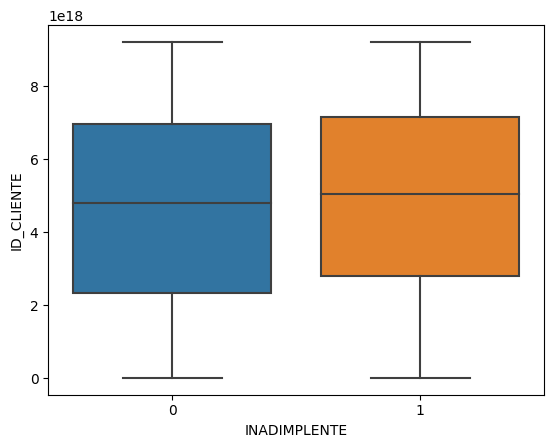

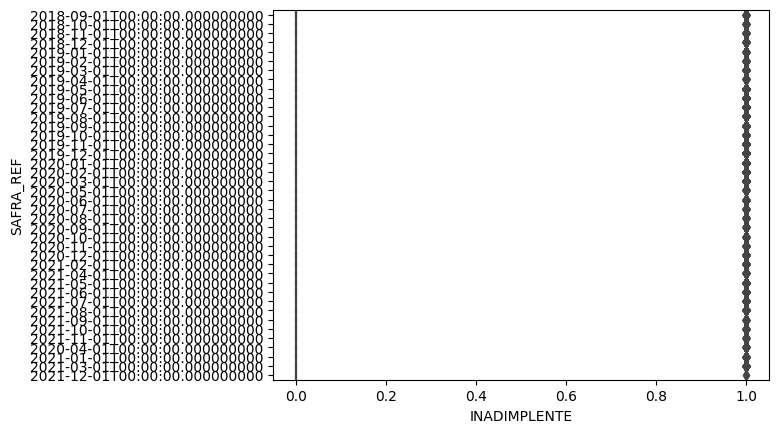

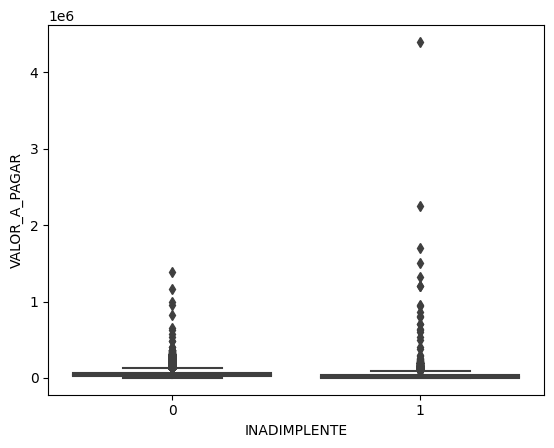

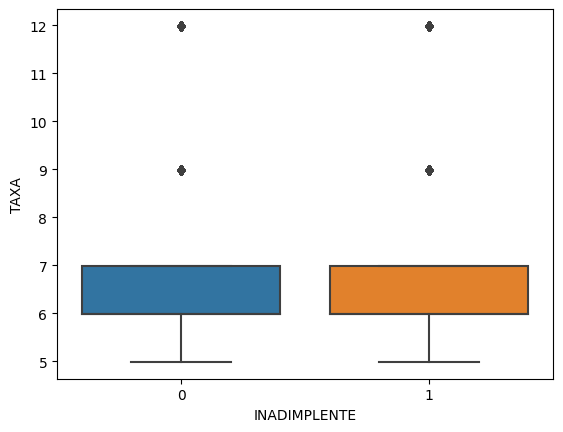

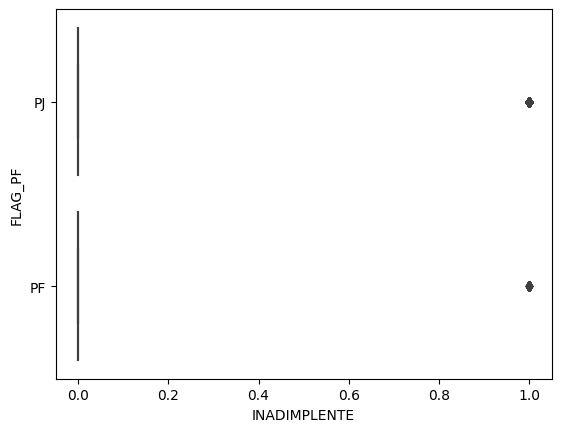

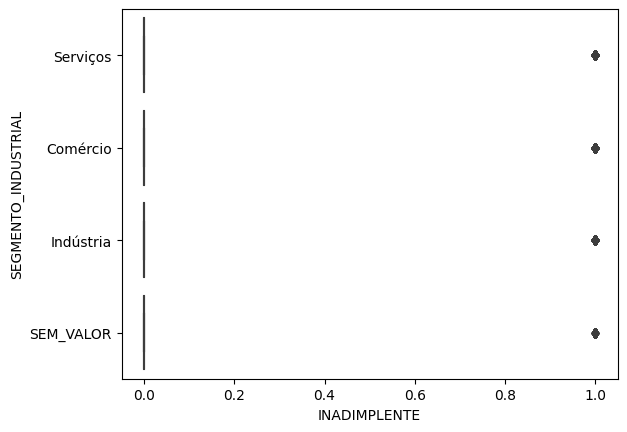

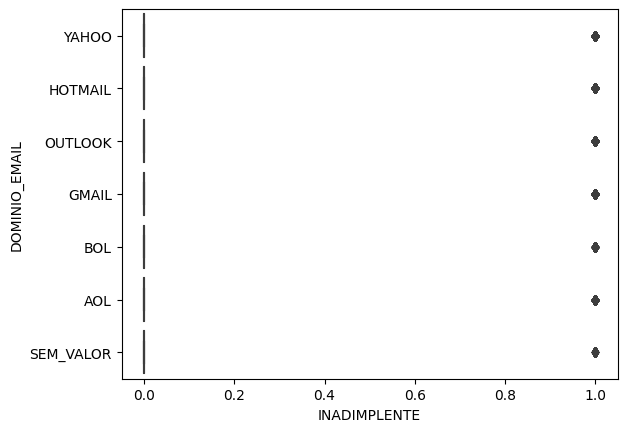

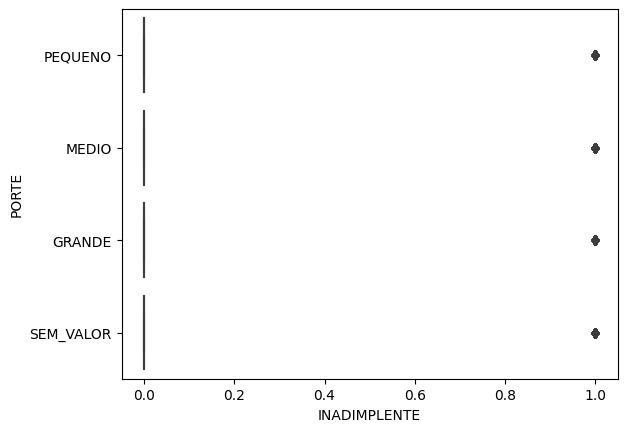

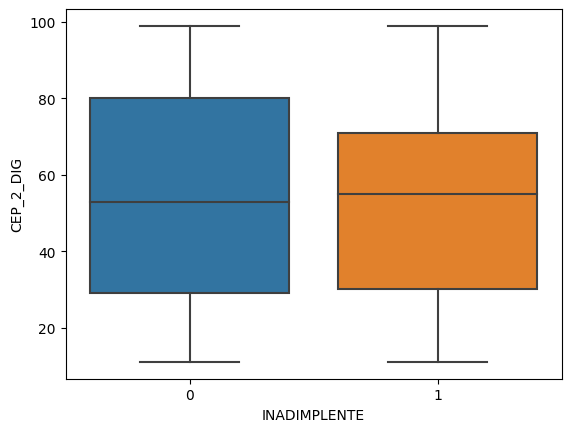

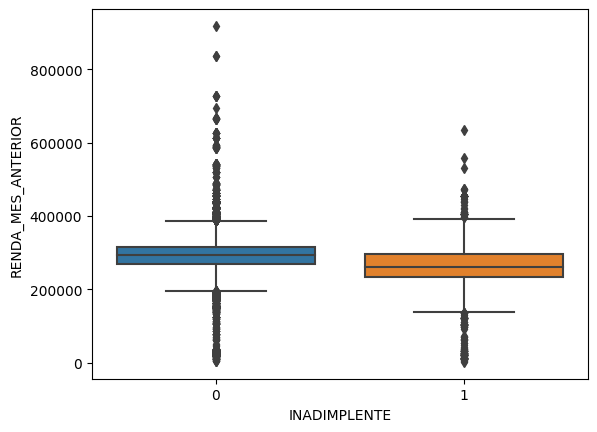

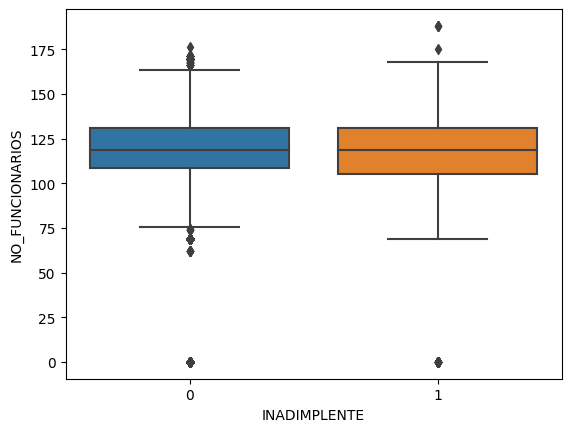

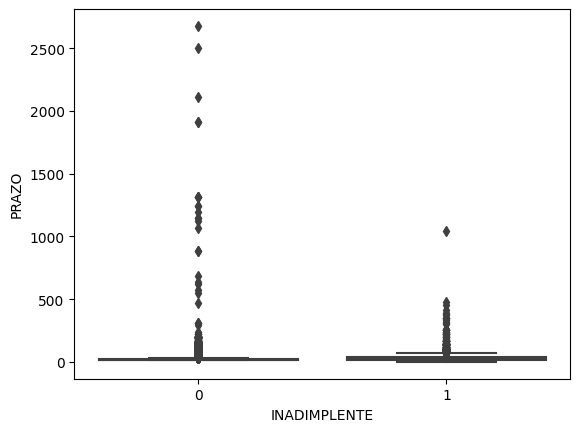

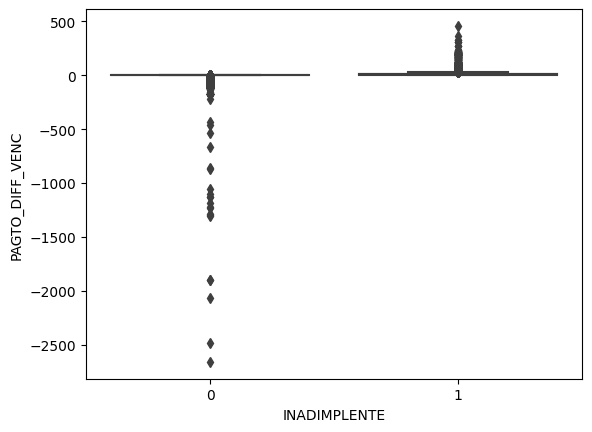

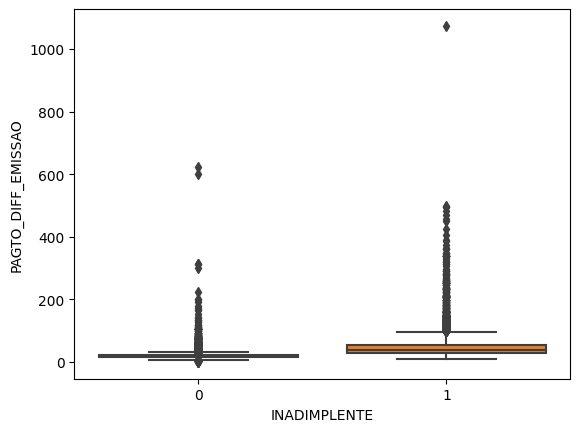

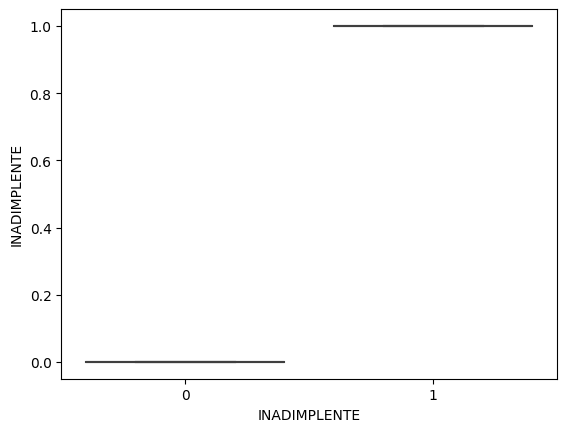

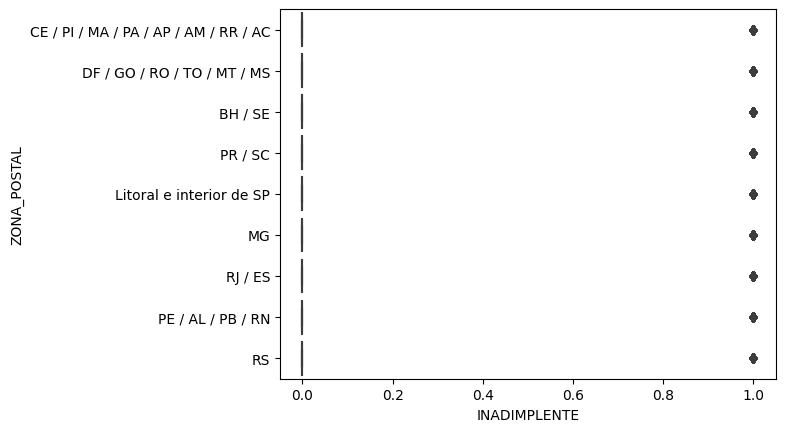

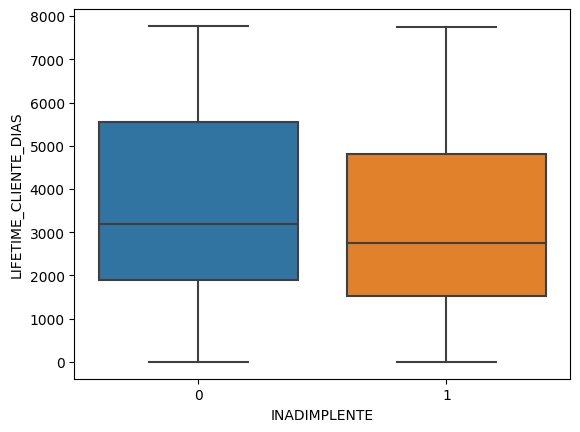

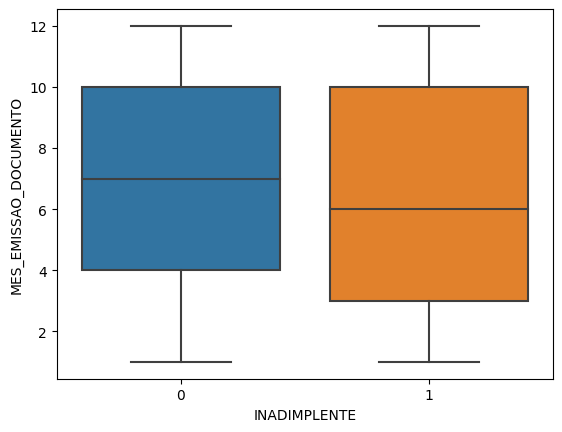

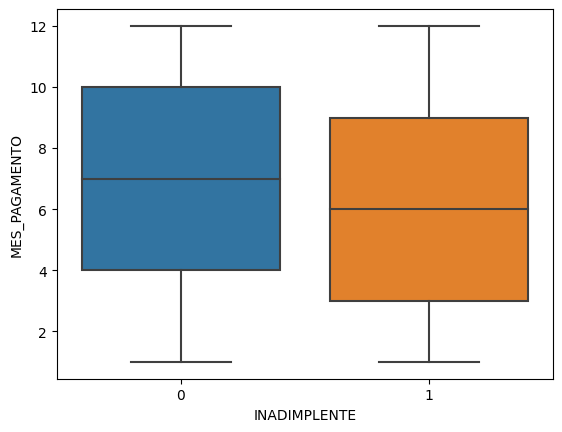

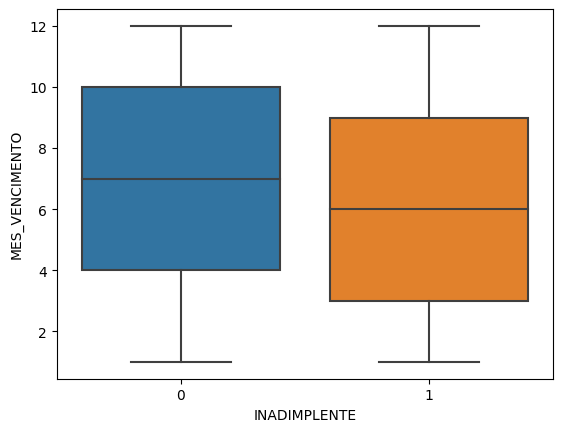

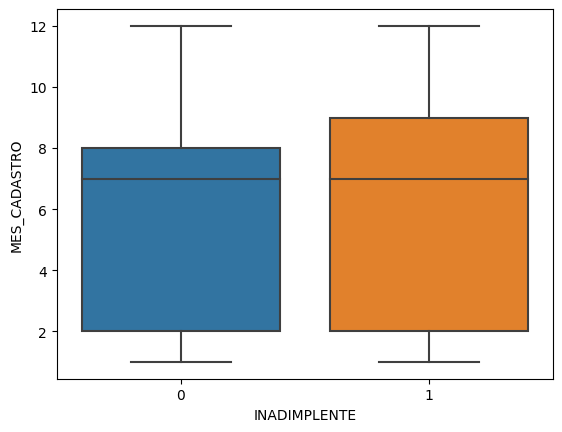

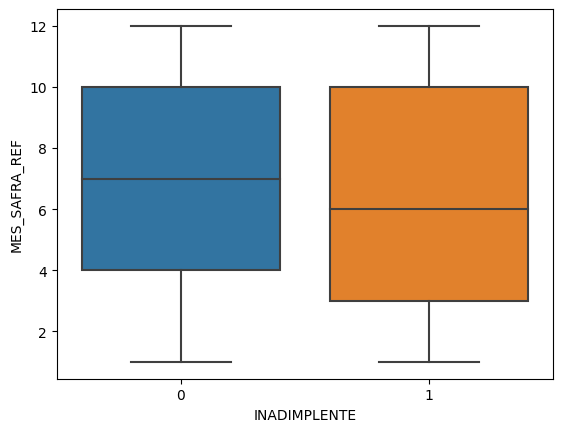

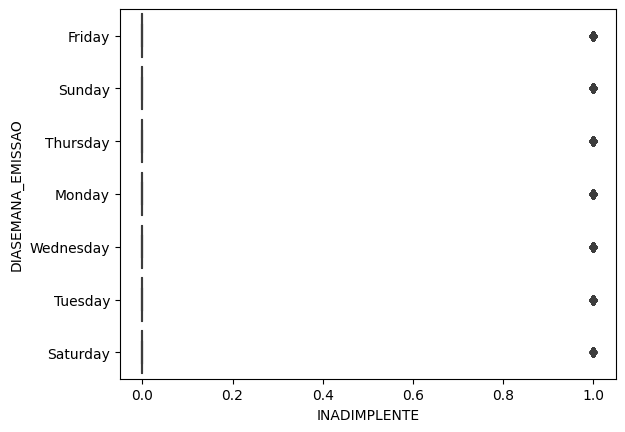

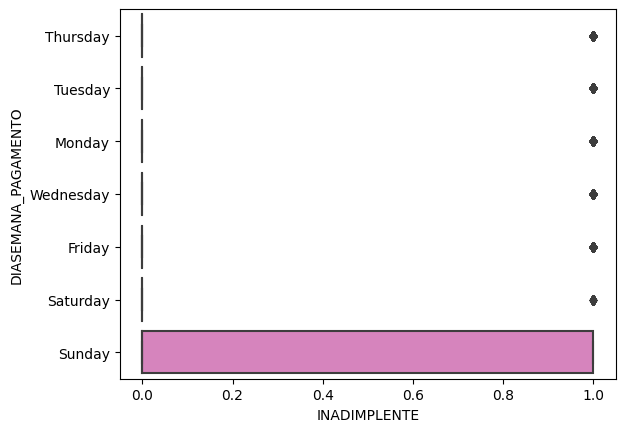

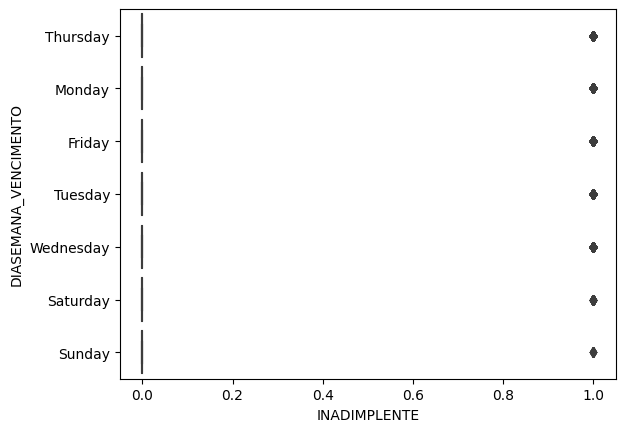

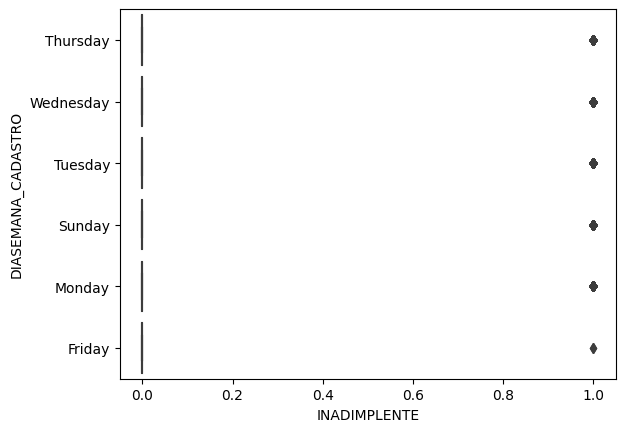

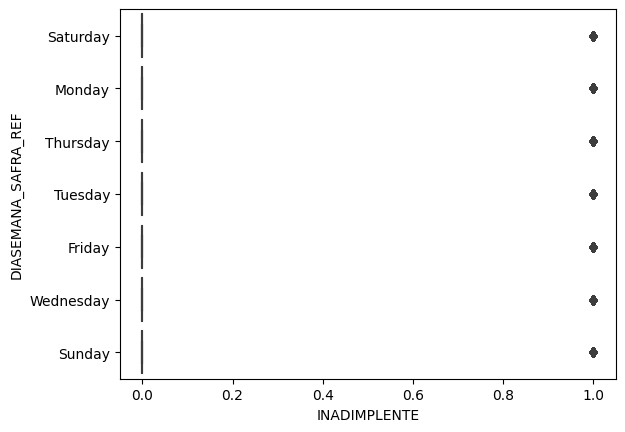

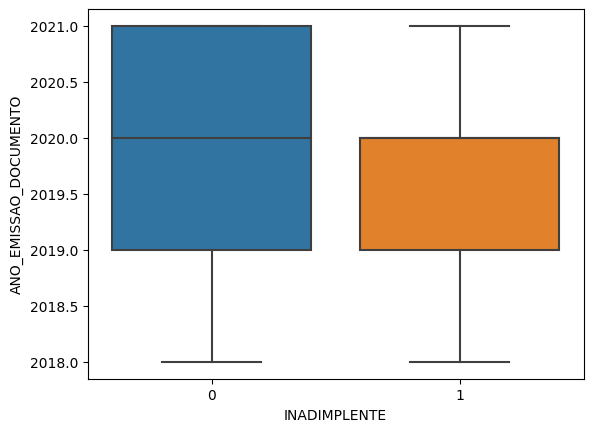

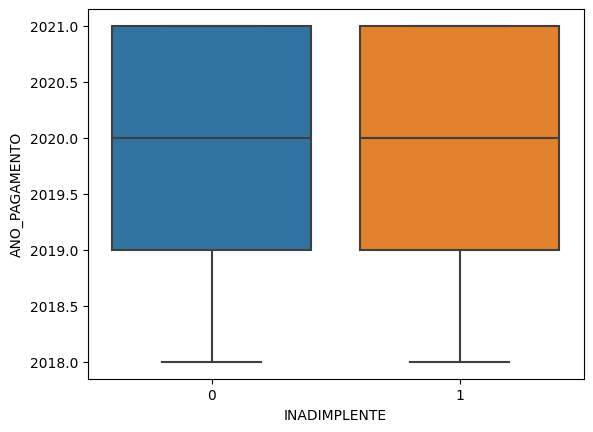

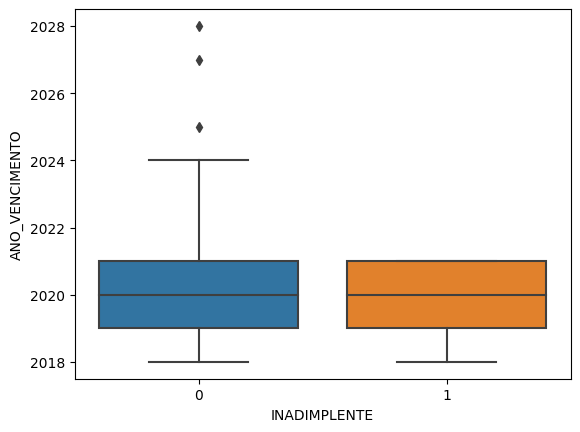

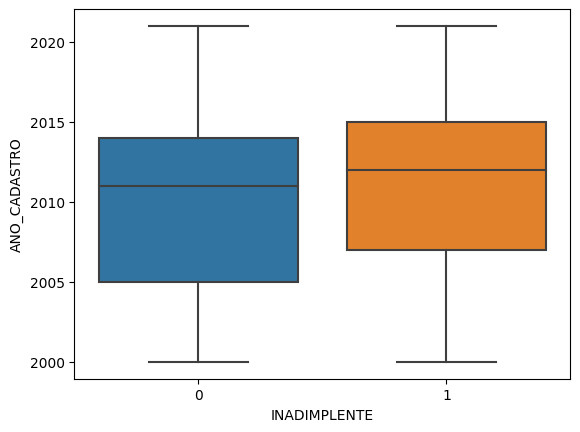

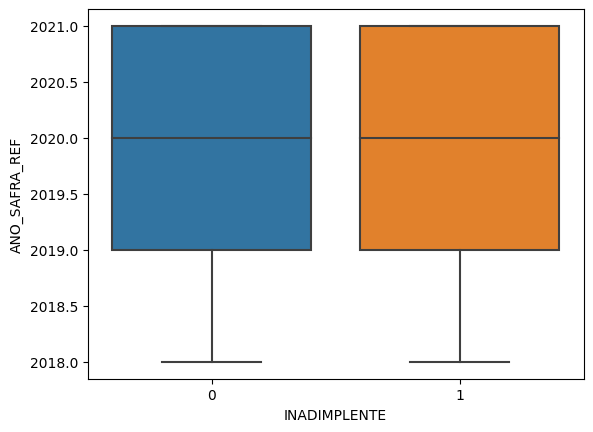

In [37]:
for i in train:
  ax = sns.boxplot(x='INADIMPLENTE', y=i, data=train)
  plt.show()

## 2.6 Salvando CSV do dataframe processado

In [38]:
train.to_csv('processed_train.csv', index=False)